In [1]:
import json
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [2]:
data = json.load(open('raw_results.json'))

In [3]:
keys = list(data.keys())

In [4]:
keys[26]

'Miqu_base--v2--/home/dnhkng/Documents/models/miqu-1-70b-sf-4.0bpw-h6-exl2--/home/dnhkng/Documents/LLM/EQ-Bench/None--Mistral--none--ooba--  --loader exllamav2 --franken_start 0 --franken_stop 0 --franken_repeat 1 --max_seq_len 8192 --gpu-split 18,18--'

In [5]:
first_pass_data = []
revised_data = []
score_data = []
for i in range(26, len(keys)-1):
    row_first_pass_data = np.zeros(170)
    row_revised_data = np.zeros(170)
    for j in range(170):
        try:
            row_first_pass_data[j] = np.array(data[keys[i]]['iterations']['1']['individual_scores'][str(j+1)]['first_pass_score'])
            row_revised_data[j] = np.array(data[keys[i]]['iterations']['1']['individual_scores'][str(j+1)]['revised_score'])
        except Exception as e:
            print(e, i, j, keys[i])
    first_pass_data.append(row_first_pass_data)
    revised_data.append(row_revised_data)
    score_data.append(data[keys[i]]['iterations']['1']['benchmark_results_fullscale']['final_score'])


In [51]:
bst = xgb.XGBRegressor()

In [52]:
first_pass_data_array = np.array(first_pass_data)
revised_data_array = np.array(revised_data)
all_data = np.hstack((first_pass_data, revised_data))

bst.fit(all_data, score_data)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Text(0.5, 1.0, 'Feature Importance')

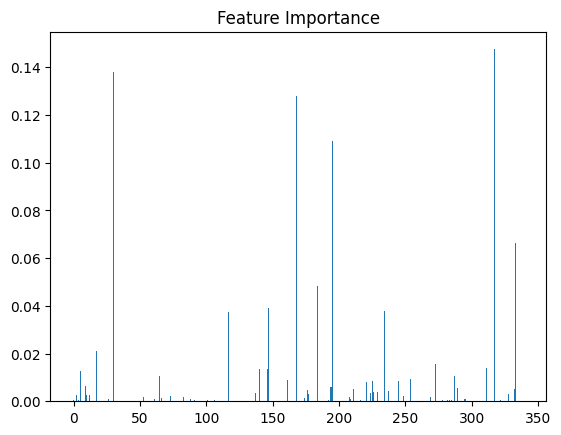

In [53]:
# plot
plt.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
plt.title('Feature Importance')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

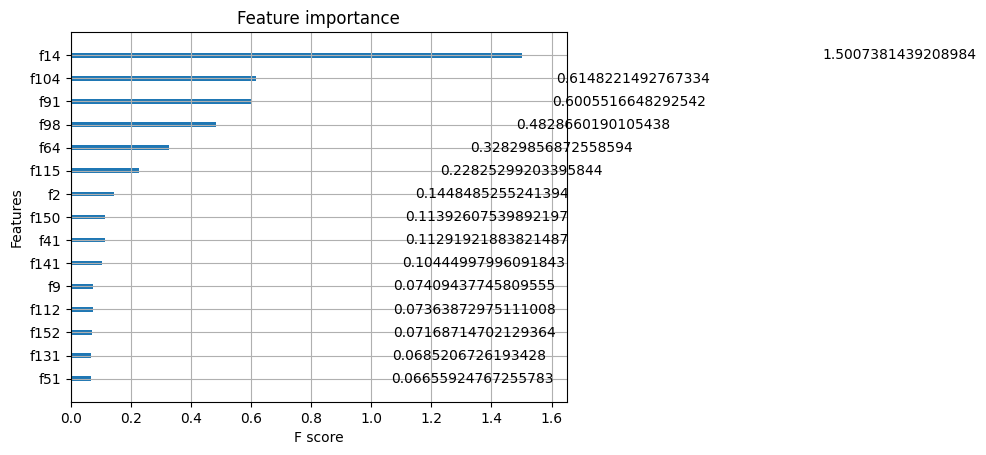

In [64]:
plot_importance(bst, max_num_features=15, importance_type='gain')

In [106]:
# Get feature importance
feature_importances = bst.feature_importances_

# Number of top features to select
N = 20

# Identify the indices of the top N features
top_n_indices = np.argsort(feature_importances)[-N:]

# Print the indices of the top N features
print(f"Indices of top {N} features: {top_n_indices}")

# Optional: Print the importance scores of the top N features
print(f"Importance of top {N} features: {feature_importances[top_n_indices]}")

Indices of top 20 features: [ 49 162 103  24 138  51 131 152 112   9 141  41 150   2 115  64  98  91
 104  14]
Importance of top 20 features: [0.00771895 0.00939081 0.01004889 0.01033574 0.01040415 0.0126325
 0.01300477 0.01360574 0.01397614 0.01406262 0.01982391 0.02143132
 0.02162241 0.02749128 0.0433209  0.06230888 0.09164475 0.1139807
 0.11668915 0.2848301 ]


Text(0.5, 1.0, 'Feature Importance')

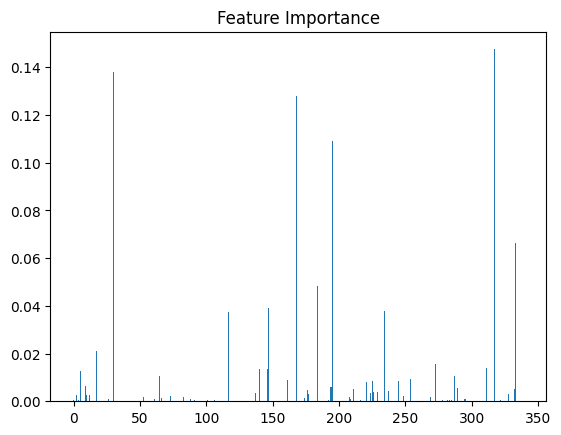

In [49]:
bst.fit(all_data, score_data)
plt.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
plt.title('Feature Importance')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

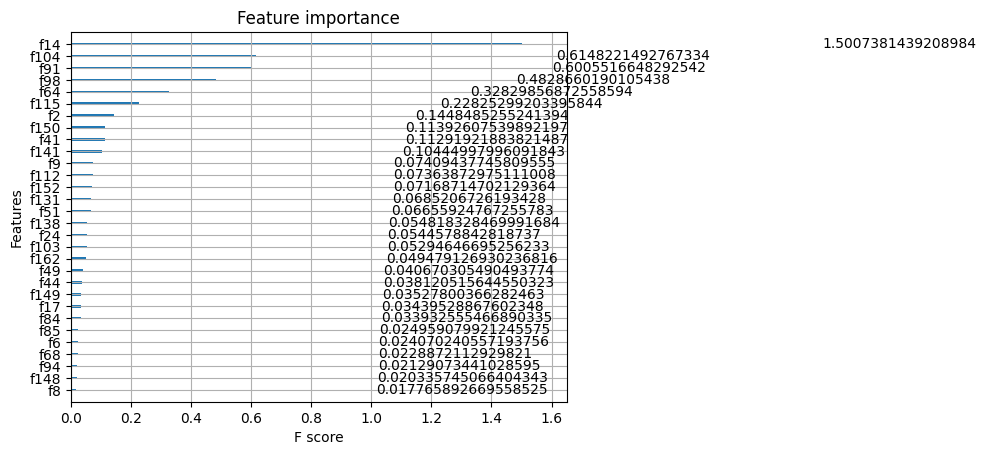

In [105]:
plot_importance(bst, max_num_features=30, importance_type='gain')

Text(0.5, 1.0, 'Feature Importance')

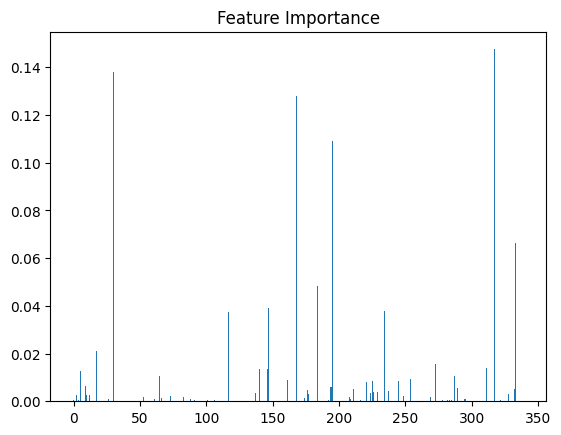

In [44]:
bst.fit(all_data, score_data)
plt.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
plt.title('Feature Importance')

In [107]:
some_data = all_data[:, [49, 162, 103,  24, 138,  51, 131, 152, 112,   9, 141,  41, 150,   2, 115,  64,  98,  91, 104,  14]]

In [110]:
bst2 = xgb.XGBRegressor()
bst2.fit(some_data[:26, :], score_data[:26])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
bst2.predict(some_data)

array([82.70638 , 82.323906, 83.12991 , 81.654106, 82.86528 , 82.335144,
       82.75416 , 82.19463 , 82.991   , 82.26727 , 82.56739 , 82.22864 ,
       82.87727 , 83.020424, 81.86752 , 81.94854 , 81.704506, 82.66025 ,
       81.95012 , 83.80779 , 82.568634, 82.15786 , 82.63108 , 82.34987 ,
       82.70933 , 82.53642 , 81.79008 , 82.70291 , 82.7037  , 82.70291 ,
       81.70379 , 82.70291 , 82.6239  , 82.70291 , 81.70568 , 82.70638 ,
       82.70291 , 81.703   , 81.70379 , 82.7037  , 81.70379 , 82.70291 ,
       81.703   , 82.70291 , 82.7037  , 81.703   , 81.702065, 82.35379 ,
       81.912964, 82.48022 , 82.45486 , 83.80779 ], dtype=float32)

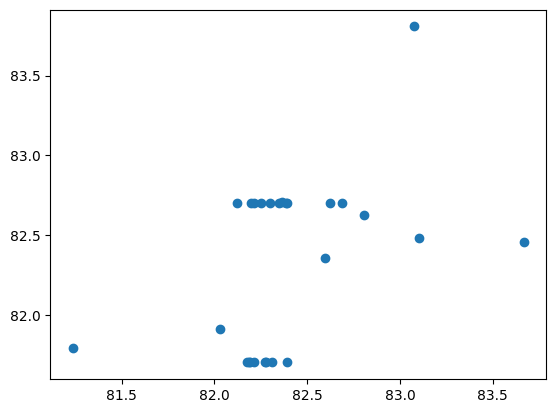

In [113]:
plt.plot(score_data[26:], bst2.predict(some_data[26:]), 'o')  

In [114]:
some_data = all_data[:, [115,  64,  98,  91, 104,  14]]
bst2 = xgb.XGBRegressor()
bst2.fit(some_data[:26, :], score_data[:26])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

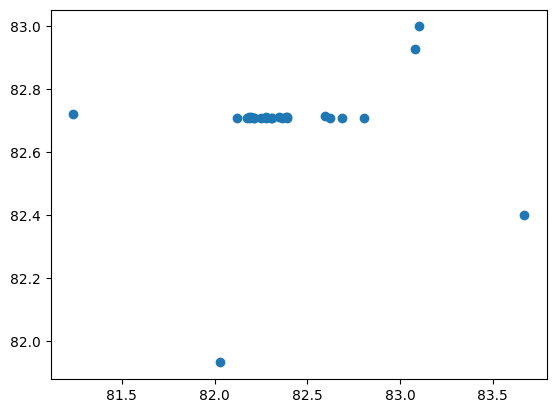

In [115]:
plt.plot(score_data[26:], bst2.predict(some_data[26:]), 'o')  

In [117]:
import pandas as pd

In [120]:
pandas_data = pd.read_csv('benchmark_results.csv')

ParserError: Error tokenizing data. C error: Expected 14 fields in line 25, saw 15


In [178]:
import csv
with open('benchmark_results.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

In [181]:

score = []
distance = []
name = []
for i in range(len(your_list)):
    # print(i, your_list[i], len(your_list[i]))
    # print(your_list[i][6])
    score.append(float(your_list[i][6]))
    split = your_list[i][11].split(' ')
    distance.append(int(split[7])-int(split[5]))
    name.append(f'{split[5]}_{split[7]}')
    # print(split[5], split[7])



In [184]:
vals_creativity = [('47_72', 6.47154257926158), ('46_65', 6.4550038556865275), ('54_78', 6.39419414544318), ('21_42', 6.39014533613738), ('10_79', 6.387559284227791), ('37_79', 6.386759370694676), ('27_28', 6.368353594283349), ('34_73', 6.366699434838097), ('35_77', 6.364890374170557), ('30_52', 6.356310623998695)]

In [185]:
vals_creativity = dict(vals_creativity)

In [187]:
scoresDict = dict(zip(name, score))

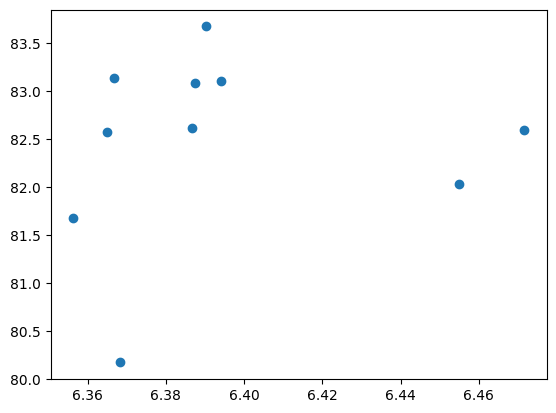

In [198]:
# creativity

vals = [('47_72', 6.47154257926158), ('46_65', 6.4550038556865275), ('54_78', 6.39419414544318), ('21_42', 6.39014533613738), ('10_79', 6.387559284227791), ('37_79', 6.386759370694676), ('27_28', 6.368353594283349), ('34_73', 6.366699434838097), ('35_77', 6.364890374170557), ('30_52', 6.356310623998695)]

vals = dict(vals)
scoresDict = dict(zip(name, score))
plt.plot(vals.values(), [scoresDict[x] for x in vals_creativity.keys()], 'o')

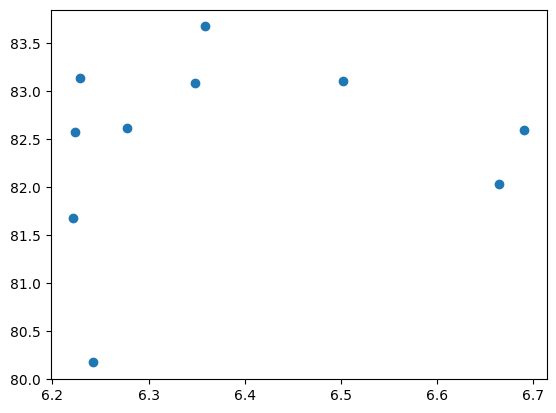

In [201]:
# craft

top_n_keys_with_averages=[('2_78', 6.690392873301221), ('45_66', 6.664846465613664), ('1_64', 6.502412249163143), ('48_79', 6.358348225044864), ('73_78', 6.348128384100221), ('49_79', 6.277953871225748), ('34_74', 6.24249354927224), ('55_76', 6.229204151113549), ('43_76', 6.223495569692659), ('18_78', 6.221654626942723)]



vals = dict(top_n_keys_with_averages)
scoresDict = dict(zip(name, score))
plt.plot(vals.values(), [scoresDict[x] for x in vals_creativity.keys()], 'o')

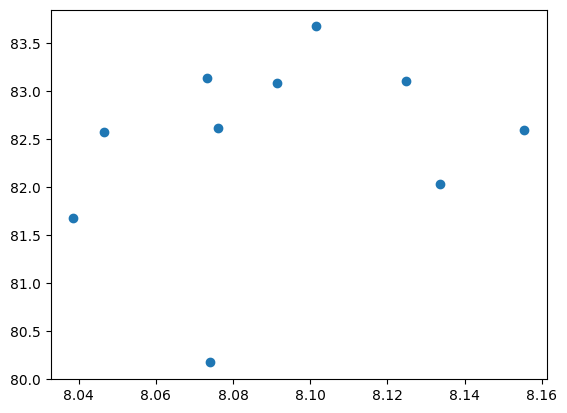

In [199]:

#consist
vals = [('22_49', 8.15537539235811), ('23_45', 8.133702947814527), ('30_51', 8.124831654512946), ('30_52', 8.10150024079303), ('19_44', 8.091296854515633), ('33_69', 8.076059007894855), ('5_30', 8.074125556813613), ('14_76', 8.073373484950821), ('3_76', 8.046537955773715), ('11_57', 8.038593155211402)]

vals = dict(vals)
scoresDict = dict(zip(name, score))
plt.plot(vals.values(), [scoresDict[x] for x in vals_creativity.keys()], 'o')

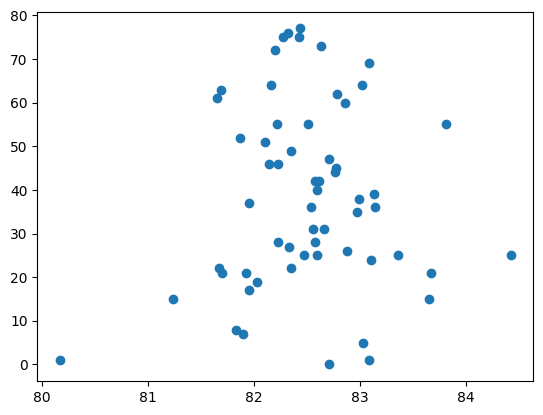

In [180]:
plt.plot(score, distance, 'o')

In [167]:
distance

[0,
 76,
 39,
 61,
 60,
 27,
 44,
 72,
 38,
 75,
 42,
 46,
 26,
 64,
 52,
 17,
 21,
 31,
 37,
 55,
 28,
 64,
 73,
 49,
 47,
 36,
 15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 25,
 19,
 24,
 21,
 69,
 42,
 1,
 22,
 45,
 55,
 55,
 25,
 75,
 8,
 28,
 22,
 21,
 25,
 62]

In [158]:
list(range(int(28))) + int(3)*(list(range(int(27),int(28)))) + list(range(int(28),70))


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 27,
 27,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69]

In [156]:
combined = [82.32,
 83.13,
 81.65,
 82.86,
 82.33,
 82.76,
 82.2,
 82.99,
 82.27,
 82.57,     ]

comb_craft = [
81.65,
83.13,
 82.27,
    82.23,
 82.88,
 83.02,
 81.87,
82.32,

 81.95,
82.57,  
]


comb_creat = [82.32,
82.86,
82.57,  
82.99,
82.66,
81.95,
82.57,
83.13,
83.81,
82.57,]

m2_creat = [ 82.59,
 82.03,
 83.1,
 83.67,
 83.08,
 82.61,
 83.08,
 81.67,]


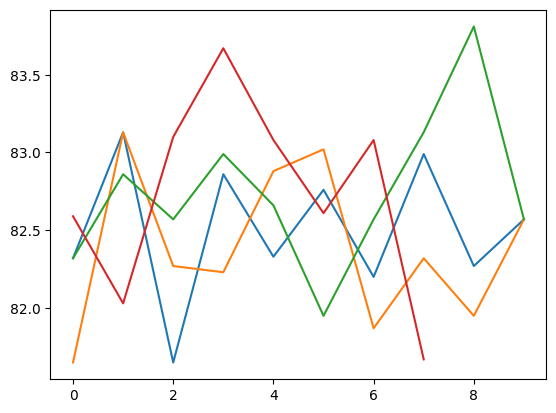

In [157]:
plt.plot(combined)
plt.plot(comb_craft)
plt.plot(comb_creat)
plt.plot(m2_creat)

In [1]:
top_n_keys_with_averages=[('22_49', 8.15537539235811), ('23_45', 8.133702947814527), ('30_51', 8.124831654512946), ('30_52', 8.10150024079303), ('19_44', 8.091296854515633), ('33_69', 8.076059007894855), ('5_30', 8.074125556813613), ('14_76', 8.073373484950821), ('3_76', 8.046537955773715), ('11_57', 8.038593155211402)]









vals = dict(top_n_keys_with_averages)
scoresDict = dict(zip(name, score))

plt.plot(vals.values(), [scoresDict[x] for x in vals_creativity.keys()], 'o')

NameError: name 'name' is not defined

In [212]:
num_layers = 91
layers = list(range(30)) + list(range(5,78)) + list(range(73,num_layers))

layers

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90]